# Visuals
Purpose of this is to examine the ingredients and create visuals

In [1]:
import nltk
import pandas as pd
import numpy as np
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

### Import csv file

In [2]:
food = pd.read_csv('Recipe_Data_Cleaned.csv')

In [3]:
food.head()

,Title,Ingredients,Ingredient Nouns
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","['chicken', 'kosher', 'salt', 'squash', 'lb', ..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...","['egg', 'potato', 'inch', 'diameter', 'kosher'..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...","['milk', 'milk', 'powder', 'onion', 'powder', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...","['round', 'loaf', 'cut', 'oil', 'sweet', 'saus..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","['dark', 'brown', 'sugar', 'water', 'oz', 'bou..."


In [4]:
#Rename 
food['IngredientNouns'] = food['Ingredient Nouns']

In [5]:
import regex
food['Food_Ingredients'] = food.IngredientNouns.str.findall(r'[A-Za-z,]+').transform(''.join)

In [6]:
food.head()

,Title,Ingredients,Ingredient Nouns,IngredientNouns,Food_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","['chicken', 'kosher', 'salt', 'squash', 'lb', ...","['chicken', 'kosher', 'salt', 'squash', 'lb', ...","chicken,kosher,salt,squash,lb,sage,butter,room..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...","['egg', 'potato', 'inch', 'diameter', 'kosher'...","['egg', 'potato', 'inch', 'diameter', 'kosher'...","egg,potato,inch,diameter,kosher,salt,pepper,pa..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...","['milk', 'milk', 'powder', 'onion', 'powder', ...","['milk', 'milk', 'powder', 'onion', 'powder', ...","milk,milk,powder,onion,powder,pepper,kosher,sa..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...","['round', 'loaf', 'cut', 'oil', 'sweet', 'saus...","['round', 'loaf', 'cut', 'oil', 'sweet', 'saus...","round,loaf,cut,oil,sweet,sausage,stick,butter,..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","['dark', 'brown', 'sugar', 'water', 'oz', 'bou...","['dark', 'brown', 'sugar', 'water', 'oz', 'bou...","dark,brown,sugar,water,oz,bourbon,oz,lemon,jui..."


### Created functions, Prepare(text, pipeline) to further clean ingredients - lower case, tokenize, remove stop 

In [7]:
import re
def tokenize(text):
    return re.findall(r'[A-Za-z]+', text) #removed \'

import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.update(["cup", "tablespoon", "teaspoon", "ounce", "pound", "piece", "medium", "slice", "room", "temperature","inch","diameter","round", "cut", "lb", 'g', 'oz'])
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
    

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [8]:
food['tokens'] = food['Food_Ingredients'].apply(prepare, pipeline=pipeline)

In [9]:
#food['Food_Ing'] = food['Food_Ingredients']
food['tokens2'] = food['tokens']

# Get token frequency
### Use Counter to count the frequency of tokens 

In [10]:
from collections import Counter
counter = Counter()
food['tokens2'].map(counter.update)

0        None
1        None
2        None
3        None
4        None
         ... 
13496    None
13497    None
13498    None
13499    None
13500    None
Name: tokens2, Length: 13501, dtype: object

In [11]:
# Return 50 most common words
wordcount = counter.most_common(50)

In [12]:
#Convert list of top 50 words to DataFrame
freq_df = pd.DataFrame(wordcount, columns=['food', 'freq'])
# Update DataFrame to include top 15, for barchart
freq_df = freq_df.head(15)

In [13]:
freq_df.head()

,food,freq
0,salt,9659
1,oil,9023
2,sugar,6179
3,pepper,4960
4,kosher,4885


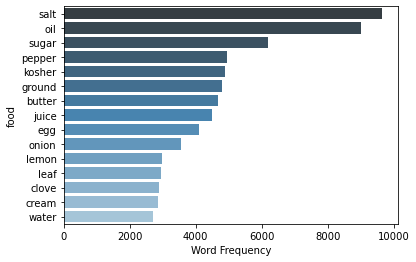

In [14]:
pal = sns.color_palette("Blues_d", len(freq_df))
sns.barplot(x="freq", y='food', data=freq_df, palette=np.array(pal[::-1]))
plt.xlabel('Word Frequency')
plt.savefig('barchart_Unigrams.png')

### Create ngrams for bi and tri grams
Find the most frequent words of recipe used in the dataset

In [15]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:]for i in range(n)])
            if len([t for t in ngram if t in stopwords])== 0]

### Bigrams

In [16]:
food['bigrams'] = food['Food_Ingredients'].apply(prepare, pipeline=[str.lower, tokenize]) \
                                .apply(ngrams, n=2, stopwords=stopwords)

In [17]:
# Apply the same method as above, but capture the frequency of bigrams
from collections import Counter
counterbigram = Counter()
food['bigrams'].map(counterbigram.update)

0        None
1        None
2        None
3        None
4        None
         ... 
13496    None
13497    None
13498    None
13499    None
13500    None
Name: bigrams, Length: 13501, dtype: object

In [18]:
# Return the 50 most frequent bigrams
bigramcount = counterbigram.most_common(50)

In [19]:
#Create DataFrame of Bigram Frequencies
counterbigram
freq_dfbi = pd.DataFrame(bigramcount, columns=['BigramFood', 'Freq'])
# Update DataFrame to only include top 15
freq_dfbi =freq_dfbi.head(15)

In [20]:
freq_dfbi.head()

,BigramFood,Freq
0,kosher salt,4757
1,lemon juice,1973
2,stick butter,1544
3,sea salt,1286
4,extravirgin oil,1085


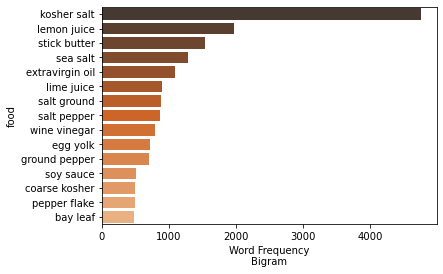

In [21]:
pal = sns.color_palette("Oranges_d", len(freq_dfbi))
sns.barplot(x="Freq", y='BigramFood', data=freq_dfbi, palette=np.array(pal[::-1]))
plt.xlabel('Word Frequency\nBigram')
plt.ylabel('food')
plt.savefig('barchart_Bigrams.png')

## Trigrams

In [22]:
food['trigrams'] = food['Food_Ingredients'].apply(prepare, pipeline=[str.lower, tokenize]) \
                                .apply(ngrams, n=3, stopwords=stopwords)

In [23]:
countertrigram = Counter()
food['trigrams'].map(countertrigram.update)

0        None
1        None
2        None
3        None
4        None
         ... 
13496    None
13497    None
13498    None
13499    None
13500    None
Name: trigrams, Length: 13501, dtype: object

In [24]:
trigramcount = countertrigram.most_common(50)

In [25]:
freq_dftri = pd.DataFrame(trigramcount, columns=['TrigramFood', 'Freq'])
freq_dftri = freq_dftri.head(15)

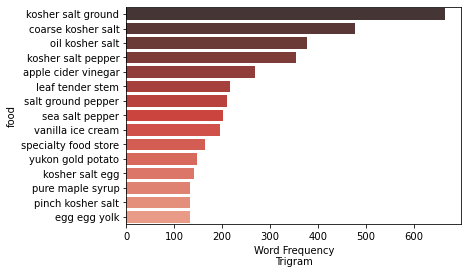

In [26]:
pal = sns.color_palette("Reds_d", len(freq_dftri))
sns.barplot(x="Freq", y='TrigramFood', data=freq_dftri, palette=np.array(pal[::-1])) #, color="b"
plt.xlabel('Word Frequency\nTrigram')
plt.ylabel('food')
plt.savefig('barchart_Trigrams.png')

In [27]:
#create column to capture the number of tokens per recipe
food['num_tokens'] = food['tokens'].map(len)

In [28]:
food.head()

,Title,Ingredients,Ingredient Nouns,IngredientNouns,Food_Ingredients,tokens,tokens2,bigrams,trigrams,num_tokens
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","['chicken', 'kosher', 'salt', 'squash', 'lb', ...","['chicken', 'kosher', 'salt', 'squash', 'lb', ...","chicken,kosher,salt,squash,lb,sage,butter,room...","[chicken, kosher, salt, squash, sage, butter, ...","[chicken, kosher, salt, squash, sage, butter, ...","[chicken kosher, kosher salt, salt squash, sag...","[chicken kosher salt, kosher salt squash, grou...",29
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...","['egg', 'potato', 'inch', 'diameter', 'kosher'...","['egg', 'potato', 'inch', 'diameter', 'kosher'...","egg,potato,inch,diameter,kosher,salt,pepper,pa...","[egg, potato, kosher, salt, pepper, parsley]","[egg, potato, kosher, salt, pepper, parsley]","[egg potato, kosher salt, salt pepper, pepper ...","[kosher salt pepper, salt pepper parsley]",6
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...","['milk', 'milk', 'powder', 'onion', 'powder', ...","['milk', 'milk', 'powder', 'onion', 'powder', ...","milk,milk,powder,onion,powder,pepper,kosher,sa...","[milk, milk, powder, onion, powder, pepper, ko...","[milk, milk, powder, onion, powder, pepper, ko...","[milk milk, milk powder, powder onion, onion p...","[milk milk powder, milk powder onion, powder o...",14
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...","['round', 'loaf', 'cut', 'oil', 'sweet', 'saus...","['round', 'loaf', 'cut', 'oil', 'sweet', 'saus...","round,loaf,cut,oil,sweet,sausage,stick,butter,...","[loaf, oil, sweet, sausage, stick, butter, oni...","[loaf, oil, sweet, sausage, stick, butter, oni...","[oil sweet, sweet sausage, sausage stick, stic...","[oil sweet sausage, sweet sausage stick, sausa...",19
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","['dark', 'brown', 'sugar', 'water', 'oz', 'bou...","['dark', 'brown', 'sugar', 'water', 'oz', 'bou...","dark,brown,sugar,water,oz,bourbon,oz,lemon,jui...","[dark, brown, sugar, water, bourbon, lemon, ju...","[dark, brown, sugar, water, bourbon, lemon, ju...","[dark brown, brown sugar, sugar water, lemon j...","[dark brown sugar, brown sugar water, lemon ju...",13


## Visuals for EDA

### Boxplot

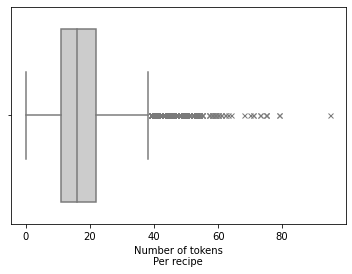

In [29]:
#Boxplot of frequency of tokens (ingredients)
sns.boxplot(x=food['num_tokens'], color = ".8", flierprops={"marker": "x"})
plt.xlabel('Number of tokens\nPer recipe')
plt.savefig('boxplot_tokens.png')

## Gather words to prepare for word cloud

In [30]:
text = " ".join(word for word in food.Food_Ingredients)
print("There are {} words in the combination of all words.".format(len(text)))

There are 2262889 words in the combination of all words.


In [31]:
#text2 = " ".join(str(word) for word in food.tokens)
#print("There are {} words in the combination of all word.".format(len(text2)))

In [32]:
#text3 = " ".join(str(word) for word in food.bigrams)

# Word Cloud

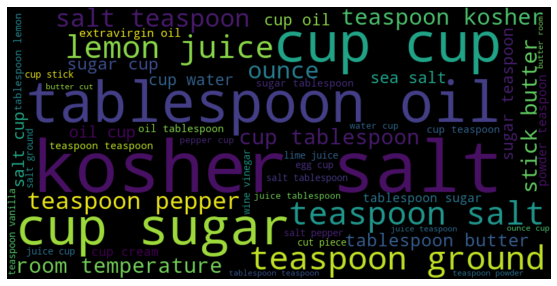

In [33]:
# Word Cloud, including measurements.
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(' '.join(food['Food_Ingredients']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud')
plt.savefig('wc_w_measurement')

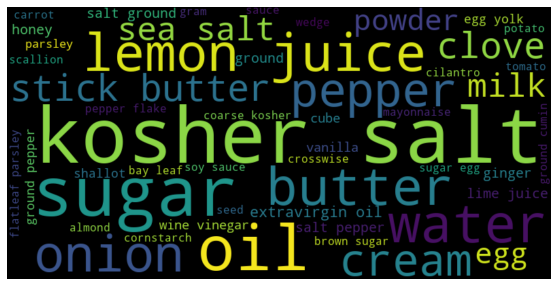

<Figure size 432x288 with 0 Axes>

In [34]:
#word cloud without measurements

import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.update(["cup", "cut", "tablespoon", "teaspoon", "ounce", "pound", "piece", "medium", "slice", "room", "temperature", "lb", 'g', 'oz'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400, max_words=50).generate(text)
plt.figure(figsize=(10, 5))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wc_wo_measurement.png')

In [35]:
# Histogram of the number of tokens per recipe

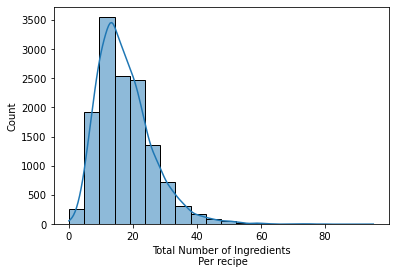

In [36]:
#histogram of ingredients per recipe
sns.histplot(data=food, x='num_tokens', bins=20, kde=True)
plt.xlabel('Total Number of Ingredients\n Per recipe')
plt.savefig('Num_Ingredients.png')

In [37]:
# Get the max number of tokens in recipe
food['num_tokens'].max()

95